<a href="https://colab.research.google.com/github/YassineOurara/Path-Planning_Q-Learning/blob/main/Robotique_Mini_Projet_Qlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


## Mini Projet Q-Learning (Mhasni Khalid & Ourara Yassine)


---



####import libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import patches
from tabulate import tabulate

In [ ]:
#Largeur et longueur de l'environnement
Li = 10
Col = 10
# Les coordonnées de but
x_obj = 9 
y_obj = 9
#la table Q est mis a zero
Q = np.zeros((Li, Col, 4))
Q

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
      

####Les actions

In [ ]:
#les actions 
actions = ['haut', 'droite', 'bas', 'gauche']

####l'environnement 

In [ ]:
# R matrice des zeros
R=np.zeros((Li,Col))
# les obstacles là où il y en a des 1
# R[1,2]=1
# R[3,6]=1
# R[3,6]=1
# R[3,4]=1
# R[6,6]=1
# R[8,8]=1

R[0,5]=1
R[0,6]=1
R[3,3]=1
R[3,4]=1
R[6,5]=1
R[6,6]=1

plan = R.copy()

print(tabulate(plan, tablefmt='github'))

|---|---|---|---|---|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 1 | 1 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |


####Reward

In [ ]:
# Reward
for i in range(10):
            for j in range(10):
                if plan[i][j]==1:
                  R[i][j]=-10
                else:
                    try:
                        R[i][j]=1/math.sqrt( ((j - x_obj)**2) + ((i -y_obj)**2))
                    except:
                        R[i][j]=100

In [ ]:
R=np.round(R, 2)
print(tabulate(R, tablefmt='github'))

|------|------|------|--------|--------|--------|--------|------|------|--------|
| 0.08 | 0.08 | 0.09 |   0.09 |   0.1  | -10    | -10    | 0.11 | 0.11 |   0.11 |
| 0.08 | 0.09 | 0.09 |   0.1  |   0.11 |   0.11 |   0.12 | 0.12 | 0.12 |   0.12 |
| 0.09 | 0.09 | 0.1  |   0.11 |   0.12 |   0.12 |   0.13 | 0.14 | 0.14 |   0.14 |
| 0.09 | 0.1  | 0.11 | -10    | -10    |   0.14 |   0.15 | 0.16 | 0.16 |   0.17 |
| 0.1  | 0.11 | 0.12 |   0.13 |   0.14 |   0.16 |   0.17 | 0.19 | 0.2  |   0.2  |
| 0.1  | 0.11 | 0.12 |   0.14 |   0.16 |   0.18 |   0.2  | 0.22 | 0.24 |   0.25 |
| 0.11 | 0.12 | 0.13 |   0.15 |   0.17 | -10    | -10    | 0.28 | 0.32 |   0.33 |
| 0.11 | 0.12 | 0.14 |   0.16 |   0.19 |   0.22 |   0.28 | 0.35 | 0.45 |   0.5  |
| 0.11 | 0.12 | 0.14 |   0.16 |   0.2  |   0.24 |   0.32 | 0.45 | 0.71 |   1    |
| 0.11 | 0.12 | 0.14 |   0.17 |   0.2  |   0.25 |   0.33 | 0.5  | 1    | 100    |


In [ ]:
#ligne Courante :Lic
#colonne Courante:Colc
#la fonction qui determine si le robot a arrivé à l'objectif 
def pointObj(Lic,Colc):
    if R[Lic,Colc]!=100.:
        return False
    else:
        return True

In [ ]:
#fonction qui choisit un Point aleatoirement
def pointDeDepart():
    #choisir les cordonnées d'un point aléatoirement
    indiceLic=np.random.randint(Li)
    indiceColc=np.random.randint(Col)
    #choisir des cordonnées différente de cordonnées de point objectif
    while pointObj(indiceLic,indiceColc):
        indiceLic=np.random.randint(Li)
        indiceColc=np.random.randint(Li)
    return indiceLic,indiceColc

In [ ]:
#choisir l'action à effectuer
def actionSuivante(indiceLic,indiceColc,epsilon):
    if np.random.random() < epsilon:
        return np.argmax(Q[indiceLic,indiceColc])
    else:
        return np.random.randint(4)
        

In [ ]:

#trouver la position suivante 
def positionSuivante(indiceLigneCourante,indiceColonneCourante,indiceAction):

    indiceLigne=indiceLigneCourante
    indiceColonne=indiceColonneCourante

    if actions[indiceAction]=='haut' and indiceLigneCourante >0:
        indiceLigne-=1

    elif actions[indiceAction]=='droite' and indiceColonneCourante < Col-1 :
        indiceColonne+=1

    elif actions[indiceAction]=='bas' and indiceLigneCourante < Li-1:
        indiceLigne+=1

    elif actions[indiceAction]=='gauche' and indiceColonneCourante >0:
        indiceColonne-=1
        
    return indiceLigne,indiceColonne

In [ ]:
#fonction pour définir le plus court chemin
def courtChemin(ligneDepart,colonneDepart):
    #verifie si l'agent déja dans le goal
    if pointObj(ligneDepart,colonneDepart):
        return "Vous etes dans le point d'arrivée"
    else :
        ligneCourante,colonneCourante=ligneDepart,colonneDepart
        chemin=[]
        #ajouter les coordonnées du point courat au chemin
        chemin.append([ligneCourante,colonneCourante])
        while not pointObj(ligneCourante,colonneCourante):
            #prendre la meilleur action, on donne à epsilon 1 car on veut l'emploit 
            indiceAction=actionSuivante(ligneCourante,colonneCourante,1.)
            #chercher la position suivante
            ligneCourante,colonneCourante=positionSuivante(ligneCourante,colonneCourante,indiceAction)
            chemin.append([ligneCourante,colonneCourante])
        return chemin

In [ ]:
# epsilon=0.9
# facteurReduction=0.9
# tauxAprentissage=0.9
# for i in range(1000):
#     #on donne au robot un point de depart aléatoirement
#     ligne,colonne=pointDeDepart()
#     #Améliorer la table q jusqu'a trouver l'objectif'
#     while not pointObj(ligne,colonne):
#         action=actionSuivante(ligne,colonne,epsilon)
#         ancienneLigne,ancienneColonne=ligne,colonne
#         ligne,colonne=positionSuivante(ligne,colonne,action)
#         bonus=R[ligne,colonne]
#         ancienneQvaleur=Q[ancienneLigne,ancienneColonne,action]
#         #mise à jour de la table q
#         #utilisation de l'équation de bellman
#         nouvelleQvaleur=ancienneQvaleur+(tauxAprentissage *bonus+(facteurReduction*np.max(Q[ligne,colonne]))-ancienneQvaleur)
#         Q[ancienneLigne,ancienneColonne,action]=nouvelleQvaleur
epsilon=0.9
gamma=0.7
for i in range(1000):
    #on donne au robot un point de depart aléatoirement
    ligne,colonne=pointDeDepart()
    #Améliorer la table q jusqu'a trouver l'objectif'
    while not pointObj(ligne,colonne):
        action=actionSuivante(ligne,colonne,epsilon)
        ancienneLigne,ancienneColonne=ligne,colonne
        ligne,colonne=positionSuivante(ligne,colonne,action)
        bonus=R[ligne,colonne]
        ancienneQvaleur=Q[ancienneLigne,ancienneColonne,action]
        #mise à jour de la table q
        #utilisation de l'équation de bellman
        r = R[ligne, colonne]
        nouvelleQvaleur = r + (gamma * np.max(Q[ligne, colonne]))
        # nouvelleQvaleur=ancienneQvaleur+(tauxAprentissage *bonus+(facteurReduction*np.max(Q[ligne,colonne]))-ancienneQvaleur)
        Q[ancienneLigne,ancienneColonne,action]=nouvelleQvaleur

In [ ]:
Q=np.round(Q, 3)
Q

array([[[  0.256,   0.567,   0.   ,   0.   ],
        [  0.564,   0.697,   0.485,   0.475],
        [  0.3  ,   0.867,   0.86 ,   0.567],
        [  0.86 ,   1.109,   1.1  ,   0.696],
        [  1.1  ,  -8.678,   1.442,   0.86 ],
        [-10.   ,  -8.293,   1.891,   0.   ],
        [-10.   ,   2.481,   0.   ,   0.   ],
        [  0.457,   3.387,   1.827,  -9.923],
        [  0.367,   4.584,   4.681,   2.459],
        [  4.584,   4.584,   6.391,   3.356]],

       [[  0.475,   0.487,   0.379,   0.   ],
        [  0.568,   0.   ,   0.307,   0.   ],
        [  0.692,   1.109,   0.   ,   0.485],
        [  0.86 ,   1.442,   1.428,   0.86 ],
        [  1.108,   1.893,   1.903,   1.108],
        [ -8.689,   2.512,   2.547,   1.428],
        [ -9.723,   1.827,   3.453,   1.869],
        [  2.459,   4.681,   0.493,   1.399],
        [  3.387,   6.391,   6.515,   1.827],
        [  0.683,   6.391,   8.959,   4.594]],

       [[  0.421,   0.   ,   0.   ,   0.   ],
        [  0.397,   0.   ,   0

In [ ]:
def visualisation(chemin,depart):
    x ,y = depart
    fig,ax = plt.subplots(figsize=(15,10))
    ax.set_xticks(np.arange(0,10))
    ax.set_yticks(np.arange(0,10))

    chemin = np.array(chemin)

    plt.xlim([0,10])
    plt.ylim([10,0])

    ax.grid(visible=True,linewidth=2)
    ax.xaxis.tick_top()
    if chemin is not None:
        ax.plot(chemin[:,1] + 0.3,chemin[:,0] + 0.3,c='black')

    for i in range(10):
        for j in range(10):
            if plan[i][j] == 1:
                rect = patches.Rectangle((j,i), 1, 1, linewidth=1, edgecolor='r', facecolor='r')
                # cir = plt.Circle((j, i), 0.4, color='r')
                ax.add_patch(rect)

    cir = plt.Circle((10, 10), 0.7, color='g')
    ax.add_patch(cir)

    rect = patches.Rectangle((x,y), 1, 1, linewidth=1, edgecolor='b', facecolor='b')
    cir = plt.Circle((x, y), 0.7, color='b')
    ax.add_patch(cir)

    plt.show()


In [ ]:
print("le plus court chemin de (0,0) pour atteindre l'objectif (9,9) est\n")
print(courtChemin(0,0))
print("\nle plus court chemin de (3,0) pour atteindre l'objectif (9,9) est\n")
print(courtChemin(1,5))

le plus court chemin de (0,0) pour atteindre l'objectif (9,9) est

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4], [2, 5], [3, 5], [3, 6], [4, 6], [4, 7], [5, 7], [5, 8], [6, 8], [7, 8], [8, 8], [8, 9], [9, 9]]

le plus court chemin de (3,0) pour atteindre l'objectif (9,9) est

[[1, 5], [2, 5], [3, 5], [3, 6], [4, 6], [4, 7], [5, 7], [5, 8], [6, 8], [7, 8], [8, 8], [8, 9], [9, 9]]



 Le départ  (0, 0)  à (9,9) 



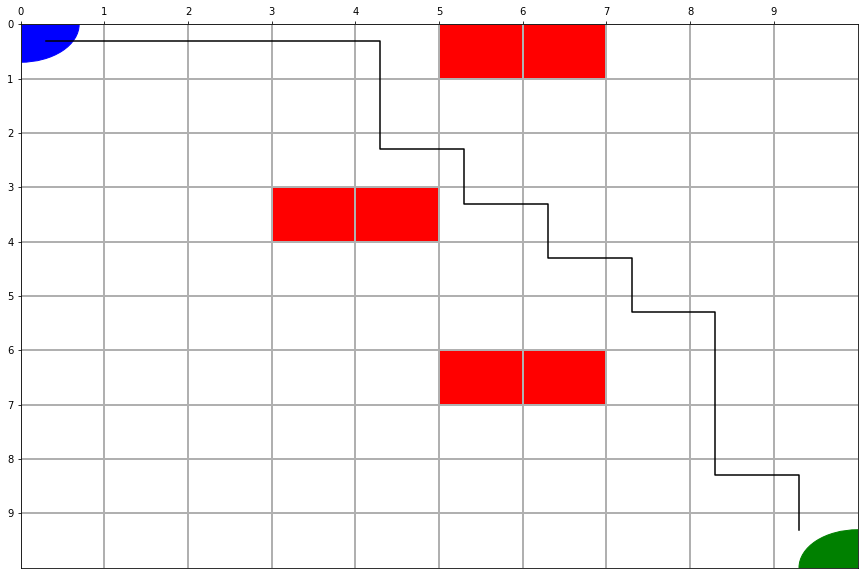


 Le départ  (1, 5)  à (9,9) 



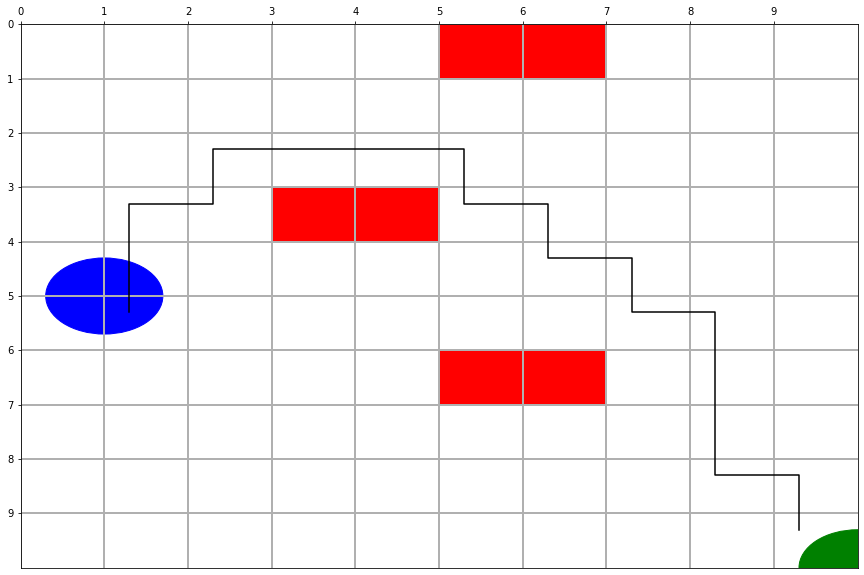

In [ ]:
depart1 =0,0
print("\n Le départ ",depart1," à (9,9) \n")
visualisation(courtChemin(depart1[0],depart1[1]),depart1)

depart2 =1,5
print("\n Le départ ",depart2," à (9,9) \n")
visualisation(courtChemin(depart2[1],depart2[0]),depart2)

